# Debugging an augmentation pipeline with ReplayCompose

An augmentation pipeline has a lot of randomness inside it. It applies augmentations with some probabilities, and it samples parameters for those augmentations (such as a rotation angle or a level of changing brightness) from a random distribution.

It could be very useful for debugging purposes to see which augmentations were applied to the image and look at the parameters of those augmentations.

`ReplayCompose` tracks augmentation parameters. You can inspect those parameters or reapply them to another image.

### Import the required libraries

In [1]:
import random

import cv2
import matplotlib.pyplot as plt
import albumentations as A

### Define the visualization function

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

### Load an image from the disk

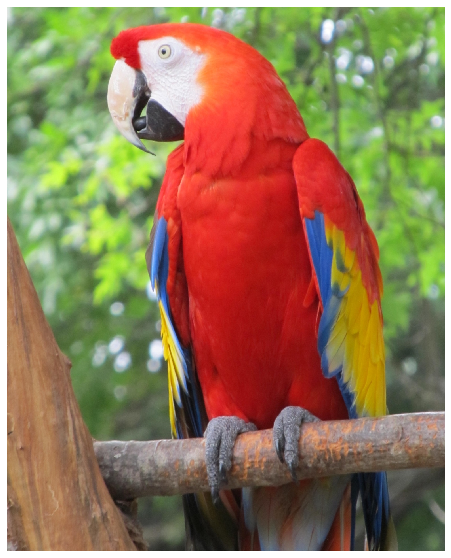

In [3]:
image = cv2.imread('images/parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

### Declare an augmentation pipeline using `ReplayCompose`

In [4]:
transform = A.ReplayCompose([
    A.Resize(512, 512, always_apply=True),
    A.RandomCrop(200, 200, always_apply=True),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])

We fix the random seed for visualization purposes, so the augmentation will always produce the same result. In a real computer vision pipeline, you shouldn't fix the random seed before applying a transform to the image because, in that case, the pipeline will always output the same image. The purpose of image augmentation is to use different transformations each time.

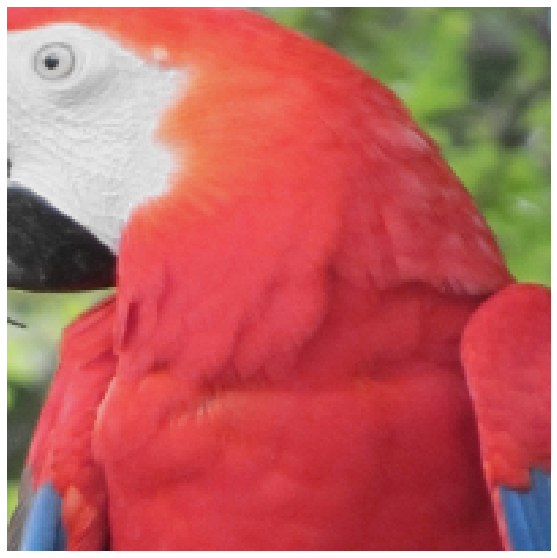

In [5]:
random.seed(7)
data = transform(image=image)
visualize(data['image'])

`data['replay']` contains information about augmentations that ere applied to the image. If `applied` is `True`, then the augmentation was applied to the image. `params` contains information about parameters that were used to transform the image.

In [6]:
data['replay']

{'__class_fullname__': 'albumentations.core.composition.ReplayCompose',
 'params': None,
 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.Resize',
   'always_apply': True,
   'p': 1,
   'height': 512,
   'width': 512,
   'interpolation': 1,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.RandomCrop',
   'always_apply': True,
   'p': 1.0,
   'height': 200,
   'width': 200,
   'params': {'h_start': 0.07243628666754276, 'w_start': 0.5358820043066892},
   'applied': True},
  {'__class_fullname__': 'albumentations.core.composition.OneOf',
   'params': None,
   'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.RGBShift',
     'always_apply': False,
     'p': 0.5,
     'r_shift_limit': (-20, 20),
     'g_shift_limit': (-20, 20),
     'b_shift_limit': (-20, 20),
     'params': None,
     'applied': False},
    {'__class_fullname__': 'albumentations.augmentations.transforms.HueSat

### Using `ReplayCompose.replay` to apply the same augmentations to another image

To apply the same set of augmentations to a new target, you can use the `ReplayCompose.replay` function.

#### Load new images

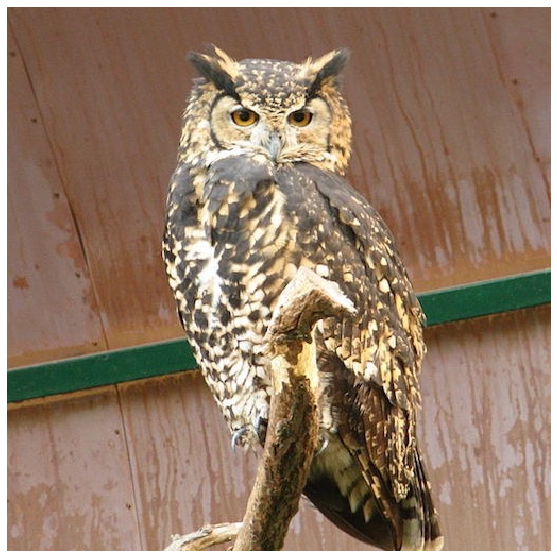

In [7]:
image2 = cv2.imread('images/image_2.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
visualize(image2)

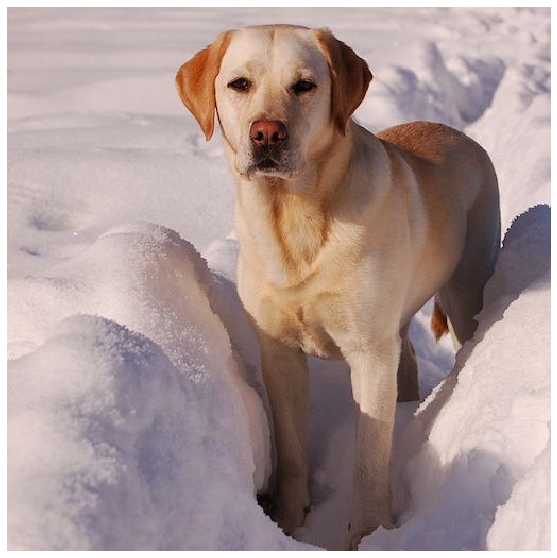

In [8]:
image3 = cv2.imread('images/image_3.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
visualize(image3)

#### Apply augmentations from data['replay'] to those images

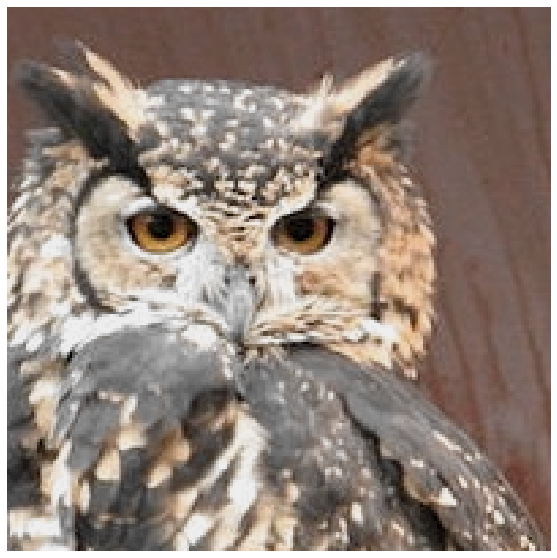

In [9]:
image2_data = A.ReplayCompose.replay(data['replay'], image=image2)
visualize(image2_data['image'])

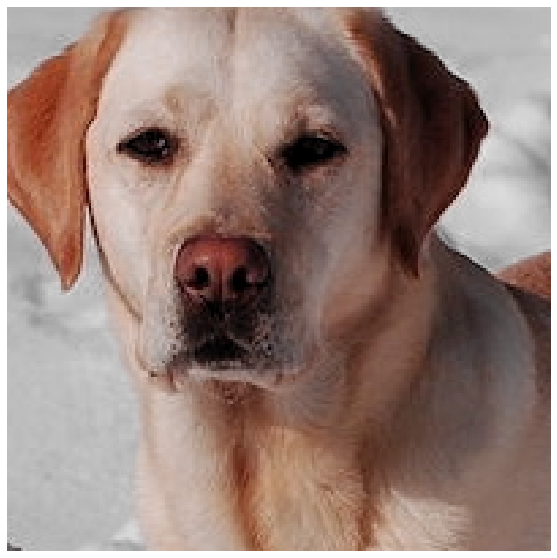

In [10]:
image3_data = A.ReplayCompose.replay(data['replay'], image=image3)
visualize(image3_data['image'])